# Generating 2000 Random Latitudes and Longitudes

In [97]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of uniform latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Unpacking the lat_lngs zip object into a list of coordinates (list of tuples)
# In this way, random latitudes and longitudes need to be created only once
coordinates = list(lat_lngs)

# Finding Corresponding Cities for Generated Coordinates

The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 and more.

In [5]:
# From the citipy module import a citipy script
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities 
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm the sufficient count
len(cities)
# only 729 cities added from 2000 random latitudes and longitudes because only unique pairs were added. 
# there must have been duplicates in the generated lat and lngs.

729

**There are only 729 UNIQUE cities generated because of duplicate combinations of latitudes and longitudes.**

# Example of API Request for Weather Data in Boston

In [7]:
# Import requests library to request data through API
import requests

In [8]:
# Import the API key
from config import api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [10]:
# Create an end point url for the city 
query = "Boston"

In [11]:
query_url = url + "&q=" + query
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc343adc8265fc01f4a59b9598ba22e9&q=Boston


In [12]:
city_weather = requests.get(query_url)
city_weather.status_code

200

In [13]:
city_weather = requests.get(query_url)
if city_weather.status_code==200:
    print(f"City Weather found.")
else:
    print(f"City Weather not found.")

City Weather found.


In [14]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":36.66,"feels_like":28.26,"temp_min":31.62,"temp_max":40.1,"pressure":1010,"humidity":46},"visibility":10000,"wind":{"speed":13,"deg":288,"gust":20},"clouds":{"all":42},"dt":1645289833,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1645270516,"sunset":1645309271},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [15]:
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 36.66,
  'feels_like': 28.26,
  'temp_min': 31.62,
  'temp_max': 40.1,
  'pressure': 1010,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 13, 'deg': 288, 'gust': 20},
 'clouds': {'all': 42},
 'dt': 1645289833,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1645270516,
  'sunset': 1645309271},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 40.1 46 42 13


In [17]:
# save the date timestamp
date = boston_data["dt"]
date

1645289833

In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [19]:
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-02-19 16:57:13'

# Making an API Call to Request Weather Data for All 729 Cities

In [22]:
# Create a list for holding extracted weather data for cities
city_data=[]

In [21]:
import time

**The OpenWeatherMap API** only allows 60 calls per minute on their free tier, so we need to pause our program for one minite after each set of 50 to prevent time-out erros. 

We will group the cities in sets of 50 to log the process as we find the weather data for each city
Two counters will be needed - one to log the city count from 1 to 50, and another to log the sets 

We need to iterate through our list of cities and build url for each city, while grouping them in sets of 50. To do this, we use 
_for i, city in enumerate(cities):_ 

and the index will tell us when we get to 50. 

Once we get to 50, we tell the program to pause for 60 seconds using 
_time.sleep(60)_

In [23]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # If making more calls without stopping will exceed 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") 
    # Removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
    # This will find the corresponding weather data for the city instead of finding the weather data 
    # for the first part of the city name.

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        #pass # general purpose statement to handle all errors encountered

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | axim
Processing Record 2 of Set 1 | zolotinka
City not found. Skipping...
Processing Record 3 of Set 1 | gwadar
Processing Record 4 of Set 1 | assiniboia
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | zachepylivka
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | kirkland lake
Processing Record 12 of Set 1 | kerewan
Processing Record 13 of Set 1 | seoul
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | taseyevo
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | gazanjyk
Processing Record 19 of Set 1 | luyang
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 21 of Set 1 | santa m

Processing Record 32 of Set 4 | camalu
Processing Record 33 of Set 4 | vigrestad
Processing Record 34 of Set 4 | cody
Processing Record 35 of Set 4 | saint-augustin
Processing Record 36 of Set 4 | dumai
Processing Record 37 of Set 4 | zhigansk
Processing Record 38 of Set 4 | okhotsk
Processing Record 39 of Set 4 | marawi
Processing Record 40 of Set 4 | blagoyevo
Processing Record 41 of Set 4 | caravelas
Processing Record 42 of Set 4 | raghunathpur
Processing Record 43 of Set 4 | kropotkin
Processing Record 44 of Set 4 | tondano
Processing Record 45 of Set 4 | saint anthony
Processing Record 46 of Set 4 | ahuimanu
Processing Record 47 of Set 4 | hami
Processing Record 48 of Set 4 | faya
Processing Record 49 of Set 4 | hofn
Processing Record 50 of Set 4 | henties bay
Processing Record 1 of Set 5 | kuche
City not found. Skipping...
Processing Record 2 of Set 5 | qaqortoq
Processing Record 3 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 4 of Set 5 | duvan
Processing Rec

Processing Record 19 of Set 8 | kruisfontein
Processing Record 20 of Set 8 | aklavik
Processing Record 21 of Set 8 | libertador general san martin
Processing Record 22 of Set 8 | horconcitos
Processing Record 23 of Set 8 | tungkang
City not found. Skipping...
Processing Record 24 of Set 8 | maceio
Processing Record 25 of Set 8 | bucerias
Processing Record 26 of Set 8 | dengzhou
Processing Record 27 of Set 8 | san patricio
Processing Record 28 of Set 8 | rudnya
Processing Record 29 of Set 8 | maloshuyka
City not found. Skipping...
Processing Record 30 of Set 8 | isoka
Processing Record 31 of Set 8 | luderitz
Processing Record 32 of Set 8 | dutlwe
Processing Record 33 of Set 8 | aykhal
Processing Record 34 of Set 8 | kurilsk
Processing Record 35 of Set 8 | dulce nombre de culmi
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | sao filipe
Processing Record 39 of Set 8 | khandyga
Processing Record 40 of Set 8 | cabanas
Process

Processing Record 9 of Set 12 | hirara
Processing Record 10 of Set 12 | oneonta
Processing Record 11 of Set 12 | sao miguel do araguaia
Processing Record 12 of Set 12 | sakakah
Processing Record 13 of Set 12 | uusikaupunki
Processing Record 14 of Set 12 | oga
Processing Record 15 of Set 12 | komsomolets
Processing Record 16 of Set 12 | atar
Processing Record 17 of Set 12 | araouane
Processing Record 18 of Set 12 | alice springs
Processing Record 19 of Set 12 | nurota
Processing Record 20 of Set 12 | semporna
Processing Record 21 of Set 12 | nandu
Processing Record 22 of Set 12 | bacolod
Processing Record 23 of Set 12 | agfalva
Processing Record 24 of Set 12 | qasigiannguit
Processing Record 25 of Set 12 | beidao
Processing Record 26 of Set 12 | roebourne
Processing Record 27 of Set 12 | ila
Processing Record 28 of Set 12 | el tigre
Processing Record 29 of Set 12 | udachnyy
Processing Record 30 of Set 12 | labuhan
Processing Record 31 of Set 12 | monrovia
Processing Record 32 of Set 12 

Let's break down the code so we understand fully before continuing:

- We create the for loop with the enumerate() method and reference the index and the city in the list.
- In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.
- Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
- Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
- Then we add one to the record count before the next city is processed.
- Next, we will retrieve the data from the JSON weather response for each city.

Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).

Documentation on errors and exceptions (https://docs.python.org/3.7/tutorial/errors.html)

In [89]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Axim,4.8699,-2.2405,82.81,73,97,10.67,GH,2022-02-19 17:21:46
1,Gwadar,25.1216,62.3254,72.66,62,0,8.34,PK,2022-02-19 17:21:47
2,Assiniboia,49.6334,-105.9845,33.62,64,70,19.57,CA,2022-02-19 17:21:47
3,Punta Arenas,-53.1500,-70.9167,46.42,78,100,14.97,CL,2022-02-19 17:16:57
4,Hermanus,-34.4187,19.2345,70.90,82,30,9.48,ZA,2022-02-19 17:21:47
5,Rikitea,-23.1203,-134.9692,78.04,70,13,9.13,PF,2022-02-19 17:21:47
6,Zachepylivka,49.1939,35.2394,39.33,90,100,19.33,UA,2022-02-19 17:21:48
7,Cabo San Lucas,22.8909,-109.9124,74.61,63,40,5.01,MX,2022-02-19 17:20:13
8,Kirkland Lake,48.1446,-80.0377,3.49,60,100,14.58,CA,2022-02-19 17:21:48
9,Kerewan,13.4898,-16.0888,87.91,9,14,5.93,GM,2022-02-19 17:21:48


In [90]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [91]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Regression Analysis on All Data
Scatter plots for each weather parameter against the latitude for all cities

## City Latitude vs. Maximum Temperature

In [98]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

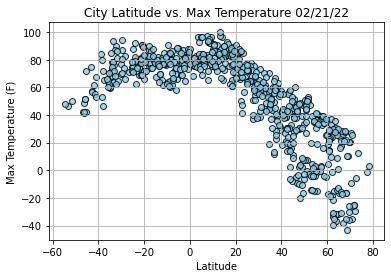

In [99]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, color="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Latitude vs Max Temp.png")

# Show plot.
plt.show()

## City Latitude vs. Humidity

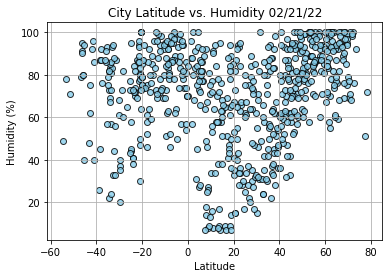

In [100]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,color="skyblue", 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Latitude vs. Humidity.png")
# Show plot.
plt.show()

## City Latitude vs. Cloudiness

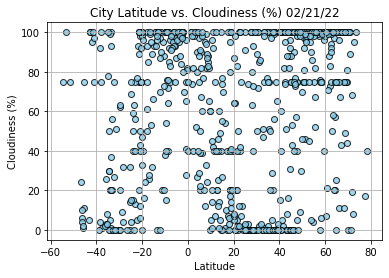

In [101]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,color="skyblue", 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Latitude vs. Cloudiness.png")
# Show plot.
plt.show()

## City Latitude vs. Wind Speed

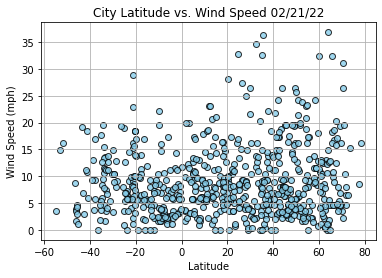

In [102]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed, color="skyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Latitude vs. Wind Speed.png")
# Show plot.
plt.show()

# Regression Analysis on Each Northen and Southern Hemispheres

## Latitude vs. Maximum Temperature

In [103]:
# Import linregress
from scipy.stats import linregress
# Import the time module.
# to add the current date rather than the datetime module
import time

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, corr_coordinates, p_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, color="skyblue", edgecolor="black", linewidths=1, alpha=0.8)
    plt.plot(x_values,regress_values,"coral")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="coral")
    
    corr_coeff = "Correlation coefficient = " + str(round(r_value, 2))
    plt.annotate(corr_coeff, corr_coordinates, color="grey")
    
    p_value = "P-value = " + str(round(p_value, 2))
    plt.annotate(p_value, p_coordinates, color="grey")
    
    today = time.strftime("%x")
    plt.title(title + "\n" + today)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

In [104]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

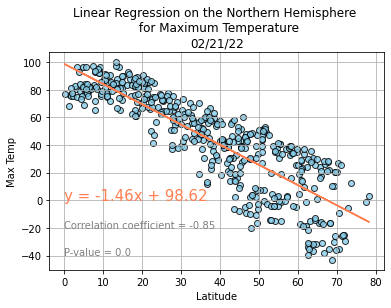

<Figure size 432x288 with 0 Axes>

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       "Max Temp",(0,0), (0, -20), (0, -40))
plt.savefig("weather_data/Latitude vs. Max Temp_North.png")

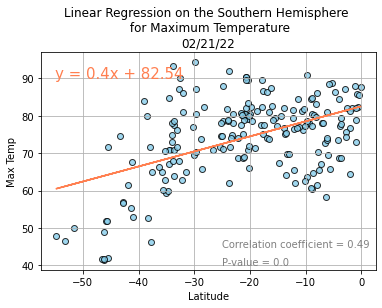

<Figure size 432x288 with 0 Axes>

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-55,90), (-25, 45), (-25, 40))
plt.savefig("weather_data/Latitude vs. Max Temp_South.png")

## Latitude vs. % of Humidity

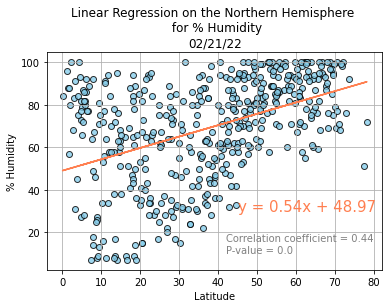

<Figure size 432x288 with 0 Axes>

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(45,30), (42,16), (42, 10))
plt.savefig("weather_data/Latitude vs. Humidity_North.png")

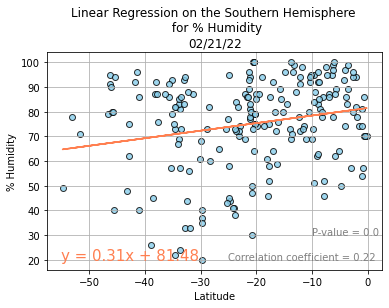

<Figure size 432x288 with 0 Axes>

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-55,20), (-25, 20), (-10, 30))

plt.savefig("weather_data/Latitude vs. Humidity_South.png")

## City Latitude vs. Cloudiness

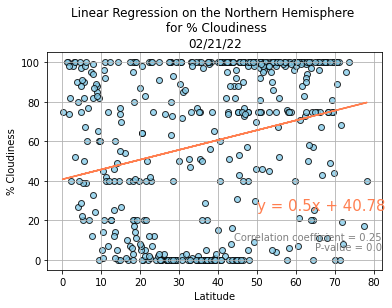

<Figure size 432x288 with 0 Axes>

In [109]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(50,25), (44, 10), (65, 5))
plt.savefig("weather_data/Latitude vs. Cloudiness_North.png")

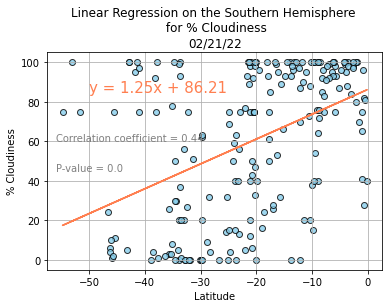

<Figure size 432x288 with 0 Axes>

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,85), (-56, 60), (-56, 45))
plt.savefig("weather_data/Latitude vs. Cloudiness_South.png")

## City Latitude vs. Wind Speed

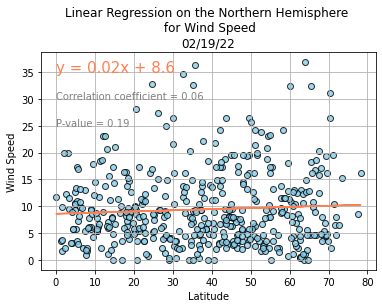

<Figure size 432x288 with 0 Axes>

In [258]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(0,35), (0, 30), (0, 25))
plt.savefig("weather_data/Latitude vs. Wind Speed_North.png")

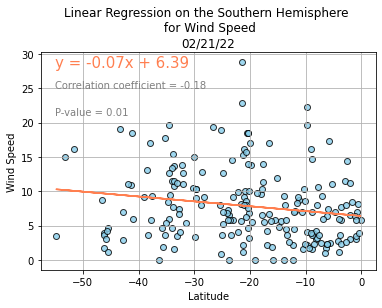

<Figure size 432x288 with 0 Axes>

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-55,28), (-55, 25), (-55, 21))
plt.savefig("weather_data/Latitude vs. Wind Speed_South.png")

# Creating Heatmpas for Weather Parameters

In [113]:
# Import the dependencies 
import pandas as pd
import gmaps
import requests

# Import the API key 
from config import g_key

In [114]:
# Store the CSV with the weather data into a DataFrame
city_data_df = pd.read_csv("WeatherPy_Database.csv")
city_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'WeatherPy_Database.csv'

In [34]:
city_data_df["Max Temp"].describe()

count    660.000000
mean      53.211712
std       32.130345
min      -43.080000
25%       35.015000
50%       63.705000
75%       78.150000
max       99.820000
Name: Max Temp, dtype: float64

In [35]:
# When using gmaps, the data must be either an integer or floating-point decimal
# Get the datatypes
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [36]:
# Configure gmaps to use your Google API Key
gmaps.configure(api_key=g_key)

## Heatmap of temperature

In [55]:
# Google heatmaps do not plot negative numbers. 
# If you have negative values, you will get an InvalidWeightException error. 

# Since the generated weather data has negative values for maximum temperatures. We need to select only positive ones. 
# Get the maximum temperature 
max_temp = city_data_df["Max Temp"]
temps = [max(temp, 0) for temp in max_temp]
# Check if the min is 0.     
temps_df = pd.DataFrame(temps)
temps_df.describe()
# Now, the number of cities has decreased to 660 cities with only positive maximum temperatures. 

,0
count,660.000000
mean,54.808333
std,28.605451
min,0.000000
25%,35.015000
50%,63.705000
75%,78.150000
max,99.820000


In [53]:
# Adjust the Heatmap Zoom, Intensity, and Point Radius

# Get the latutitude and longitude 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature 
max_temp = city_data_df["Max Temp"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

## Humidity Heatmap

In [59]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

## Cloudiness Heatmap

In [57]:
# Adjust the Heatmap Zoom, Intensity, and Point Radius

# Get the latutitude and longitude 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature 
cloudiness = city_data_df["Cloudiness"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

## Wind Speed Heatmap

In [58]:
# Adjust the Heatmap Zoom, Intensity, and Point Radius

# Get the latutitude and longitude 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature 
wind_speed = city_data_df["Wind Speed"]
# Assign the figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable
heat_layer = gmaps.heatmap_layer(locations, weights=wind_speed, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer
fig.add_layer(heat_layer)
# Call the figure to plot the data
fig

Figure(layout=FigureLayout(height='420px'))

# Get Vacation Criteria
A feature on the app that allows customers to search for travel locations based on their temperature preferences. 

In [60]:
min_temp = float(input("What is the minimum temperature you would like for your trip?"))
max_temp = float(input("What is the maximum temperature you would like for your trip?"))

What is the minimum temperature you would like for your trip?75
What is the maximum temperature you would like for your trip?90


In [66]:
# Filter the dataset to find the cities that fit criteria 
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & 
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Axim,GH,2022-02-19 17:21:46,4.8699,-2.2405,82.81,73,97,10.67
5,5,Rikitea,PF,2022-02-19 17:21:47,-23.1203,-134.9692,78.04,70,13,9.13
9,9,Kerewan,GM,2022-02-19 17:21:48,13.4898,-16.0888,87.91,9,14,5.93
17,17,Santa Maria,BR,2022-02-19 17:21:36,-29.6842,-53.8069,87.10,40,20,10.36
21,21,Chuy,UY,2022-02-19 17:21:53,-33.6971,-53.4616,77.65,57,37,10.69
25,25,Le Vauclin,MQ,2022-02-19 17:19:12,14.5452,-60.8388,84.25,58,40,17.27
26,26,Puerto Ayora,EC,2022-02-19 17:21:54,-0.7393,-90.3518,85.96,86,28,7.00
31,31,Cidreira,BR,2022-02-19 17:21:56,-30.1811,-50.2056,77.04,61,0,10.42
33,33,Atuona,PF,2022-02-19 17:21:56,-9.8000,-139.0333,78.04,73,15,22.19
46,46,Souillac,MU,2022-02-19 17:23:00,-20.5167,57.5167,79.36,100,75,18.41


In [68]:
preferred_cities_df.count()
# The final list of cities contains 193 cities and has no missing values

City_ID       193
City          193
Country       190
Date          193
Lat           193
Lng           193
Max Temp      193
Humidity      193
Cloudiness    193
Wind Speed    193
dtype: int64

## Get Travel Destinations with Nearby Hotels

In [84]:
# Create DataFrame called hotel_df to store hotel names along with 
# city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Axim,GH,82.81,4.8699,-2.2405,
5,Rikitea,PF,78.04,-23.1203,-134.9692,
9,Kerewan,GM,87.91,13.4898,-16.0888,
17,Santa Maria,BR,87.10,-29.6842,-53.8069,
21,Chuy,UY,77.65,-33.6971,-53.4616,
25,Le Vauclin,MQ,84.25,14.5452,-60.8388,
26,Puerto Ayora,EC,85.96,-0.7393,-90.3518,
31,Cidreira,BR,77.04,-30.1811,-50.2056,
33,Atuona,PF,78.04,-9.8000,-139.0333,
46,Souillac,MU,79.36,-20.5167,57.5167,


In [85]:
# Set parameters to search for a hotel in Paris
params = {
    "radius": 5000,
    "type": "lodging", 
    "key": g_key, 
    "location": "48.8566, 2.3522"
}

# Use base URL
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# Make request and get the JSON data from the search
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEAXqnH0u5eFtuNaq-Ej6E13P3l_GtP-PMOOHP39UvEgQ6V1ZekaSODaBM3PDCvfyhnWMxjC7FJomDclMGciegsDa0v1NUY1C6Sef1fMcqqDWF4g--SsfGWCXIsEXQBbaAndLV5KyiSoclAEXjS5c0V29VHZEgzdA2fGG-2IaPx40-eEizC3kGAhttlgJfvHeLy3EvJtEAojU4WFaOgoVFosh1yUe_tAUXjMMan7RB7kXWrHsZytIHTSvEbz9Co-ThwODwze9blWcfP4FbmqkhDaTYpJBRKsSH2sNMkUs7eLYaqtcLCwaggpZu49pvSydeuYb4v0yFLW-U2YPaAaiVIbz2dNI-0iKdEYTjoXhGhu22rgZuZkpphFXthWcGe9l90R0pWgYPs3PrVjyz91vpNfrkDdXbHj6W3aT1_ZgC0psJ6MUp6gYmuX',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [86]:
len(hotels["results"])

20

In [87]:
# Iterate Through hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get the latitude and longititude
    lat=row["Lat"]
    lng=row["Lng"]
    
    # Add the latitude and longitude to location key for the params dictionary
    params["Location"]=f"{lat},{lng}"
    
    # Use the search term: "lodging" and our latitude and longitude
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search 
    hotels=requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found...skipping.")



In [83]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Axim,GH,82.81,4.8699,-2.2405,Hôtel Duo
5,Rikitea,PF,78.04,-23.1203,-134.9692,Hôtel Duo
9,Kerewan,GM,87.91,13.4898,-16.0888,Hôtel Duo
17,Santa Maria,BR,87.10,-29.6842,-53.8069,Hôtel Duo
21,Chuy,UY,77.65,-33.6971,-53.4616,Hôtel Duo
25,Le Vauclin,MQ,84.25,14.5452,-60.8388,Hôtel Duo
26,Puerto Ayora,EC,85.96,-0.7393,-90.3518,Hôtel Duo
31,Cidreira,BR,77.04,-30.1811,-50.2056,Hôtel Duo
33,Atuona,PF,78.04,-9.8000,-139.0333,Hôtel Duo
46,Souillac,MU,79.36,-20.5167,57.5167,Hôtel Duo


In [88]:
# Create a Maximum Temperature Heatmap from a Hotel DataFrame

In [91]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [92]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [93]:
# Store the DataFrame row
# Iterate through each row of the hotel_df and then format the info_box_template with the data we set to populate from each row
hotel_info=[info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [94]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))